Kaggle tutorial: [aquí](https://www.kaggle.com/code/alexisbcook/missing-values/tutorial)

Dataset: [aquí](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

# **1. Lectura de Datos**

## *1.1 Ruta URL de One Drive a Python*

In [19]:
#Yo he subido previamente el archivo a mi Drive y generado este enlace para acceder a él
#estoy creando una variable url para guardar ahí el enlace y luego usarlo
url = 'https://1drv.ms/u/s!AlKZQ1jru6v8iUsC_Q4LQGM-YAou?e=YAeLd6'

Post de Medium donde explica la función para transformar One Drive URL (HTML) para usar en Python: [aquí](https://towardsdatascience.com/onedrive-as-data-storage-for-python-project-2ff8d2d3a0aa)

In [22]:
#Se importa la librería base64 que va a transformar la ruta URL (HTML)
import base64
#A continuación se define una función create_onedrive_directdownload con 1 sólo parámetro: la ruta URL (HTML)
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

In [24]:
#Usamos la función para leer el URL (HTML) y el resultado -es decir, la URL para Python- la guardamos en otra variable
#He creado esta variable python_url para guardar el resultado de la función
python_url = create_onedrive_directdownload(url)

## *1.2 Librería read_csv para leer URL*

In [26]:
#Importamos la librería panda
#La renombramos como pd para llamarla varias veces de manera rápida
import pandas as pd

In [28]:
#El método read_csv de la librería pandas permite leer archivos tipo CSV (separado por comas)
#Vamos a ingresar como parámetro -dentro del paréntesis- la nueva ruta URL generada
#Finalmente el resultado -el dataset completo- lo guardamos en una variable llamada data
data = pd.read_csv(python_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
#Comprobamos las dimensiones del archivo
data.shape

(1929690, 29)

Podemos visualizar que contamos con un archivos de casi **2 millones de filas** y **29 columnas**.

## *1.3 Análisis Exploratorio*

In [38]:
#Podemos visualizar los primeros 5 registros del dataset con el método head
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,0:17,BROOKLYN,11207.0,40.669792,-73.89240,"(40.669792, -73.8924)",WYONA STREET,SUTTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,7:00,NaN,NaN,NaN,NaN,NaN,Wood hill avenue,Sagamore avenue,NaN,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,21:35,BROOKLYN,11217.0,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


In [39]:
#Podemos visualizar el tipo de dato de cada columna con el método info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929690 entries, 0 to 1929689
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

### ¿Cómo transformar de tipo objeto a tiempo?

La librería pandas contiene un método llamado **to_datetime** que cambia el tipo de dato a tiempo:

In [44]:
#Reemplazamos la columna CRASH DATE por la nueva columna luego de aplicar el método to_datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

In [48]:
#Con el método dtypes podemos consultar el tipo de dato de una columna
#Guardamos el resultado de esta consulta en la variable data_type
data_type = data.dtypes['CRASH DATE']
#Finalmente mostramos el resultado
print(data_type)

datetime64[ns]


In [40]:
#Finalmente podemos obtener métricas estadísticas de las variables numéricas del dataset
data.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.706773e+06,1.706773e+06,1.929672e+06,1.929659e+06,1.929690e+06,1.929690e+06,1.929690e+06,1.929690e+06,1.929690e+06,1.929690e+06,1.929690e+06
mean,4.063799e+01,-7.377115e+01,2.916470e-01,1.383146e-03,5.338889e-02,7.027035e-04,2.503615e-02,1.031254e-04,2.110479e-01,5.622665e-04,3.047890e+06
std,1.873913e+00,3.547204e+00,6.840193e-01,3.925363e-02,2.373266e-01,2.702210e-02,1.580716e-01,1.020545e-02,6.455242e-01,2.589935e-02,1.502877e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066813e+01,-7.397513e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090772e+06
50%,4.072137e+01,-7.392754e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.601042e+06
75%,4.076934e+01,-7.386660e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.083726e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.566509e+06


# 2. Lectura de vacíos

## *2.1 Librería Missingno*

Github sobre utilidades de missing no: [aquí](https://github.com/ResidentMario/missingno)

In [35]:
#Importamos la librería missingo
import missingno

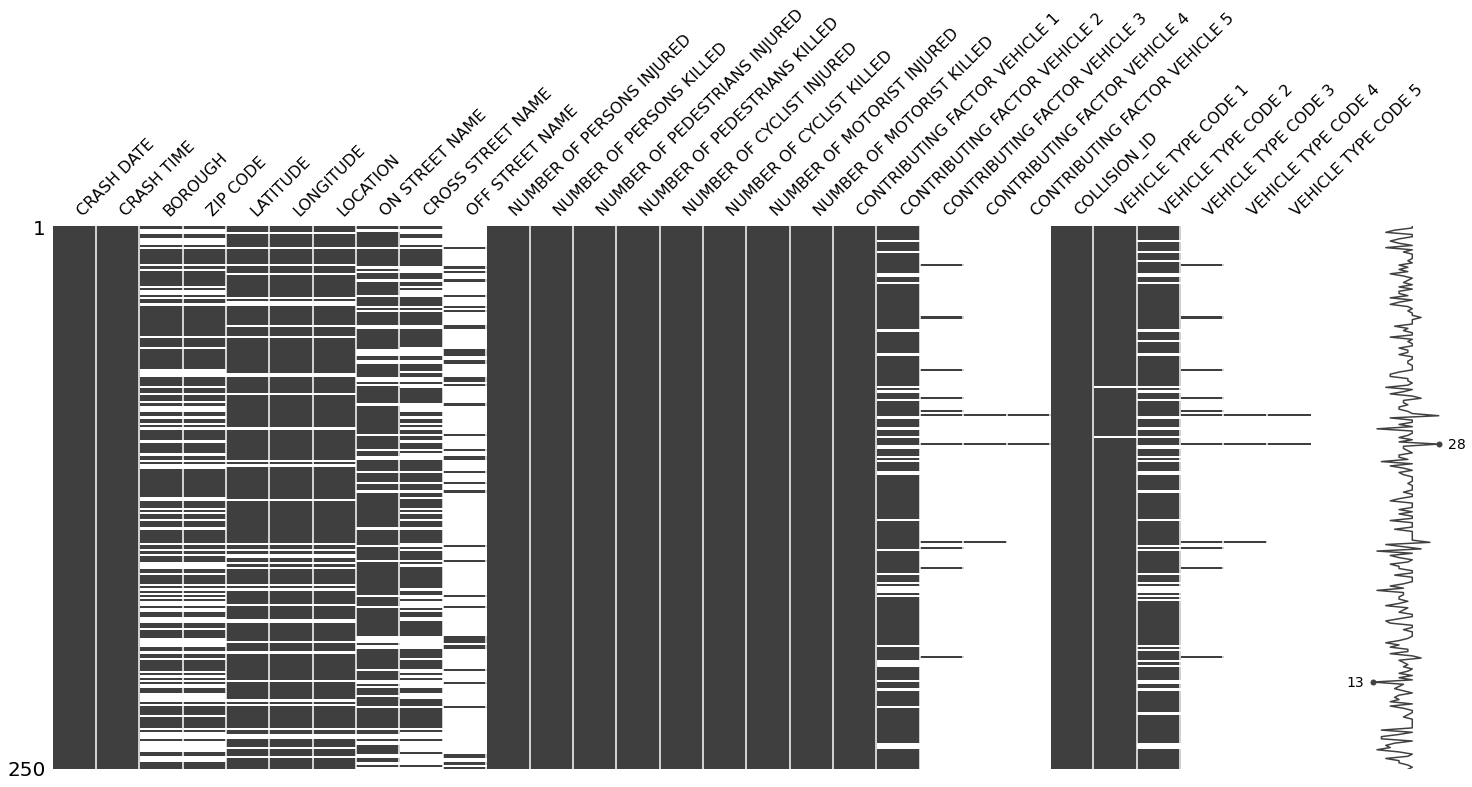

In [37]:
#Usamos la instrucción %matplotlib inline para graficar rápidamente
%matplotlib inline
#Usamos el método matrix de missingno declarando una muestra -en inglés sample- de 250 datos aleatorios
missingno.matrix(data.sample(250))

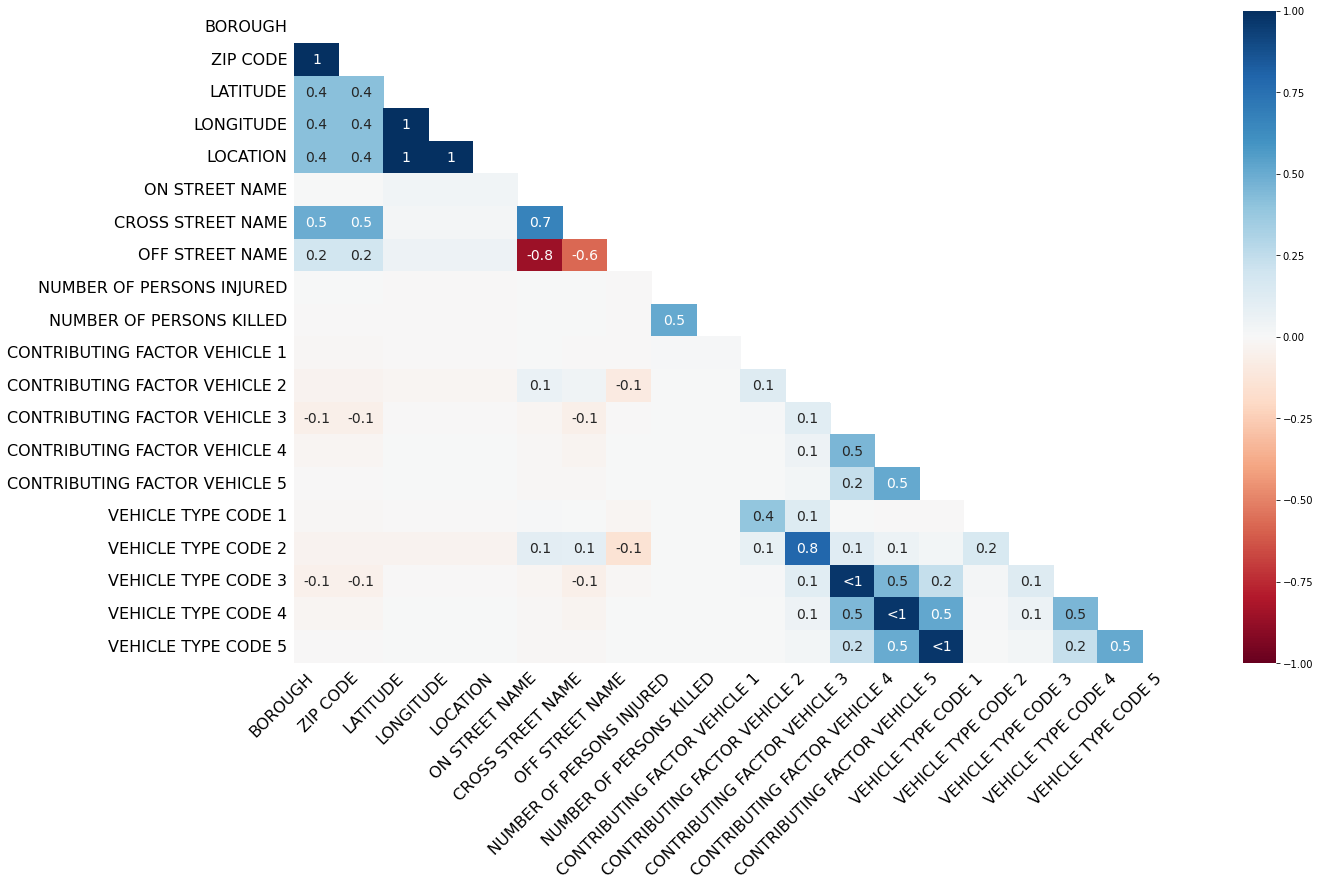

In [50]:
#Podemos visualizar en forma de matriz de correlación cómo influye cada variable para la aparición de vacíos
missingno.heatmap(data)

## *2.2 Función*

In [41]:
#Mostramos aquellas columnas que contengan vacíos
for col in data.columns:
  if data[col].isna().sum()>0:
    print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

En la columna BOROUGH hay 598606 valores nulos
En la columna ZIP CODE hay 598840 valores nulos
En la columna LATITUDE hay 222917 valores nulos
En la columna LONGITUDE hay 222917 valores nulos
En la columna LOCATION hay 222917 valores nulos
En la columna ON STREET NAME hay 400642 valores nulos
En la columna CROSS STREET NAME hay 709285 valores nulos
En la columna OFF STREET NAME hay 1621418 valores nulos
En la columna NUMBER OF PERSONS INJURED hay 18 valores nulos
En la columna NUMBER OF PERSONS KILLED hay 31 valores nulos
En la columna CONTRIBUTING FACTOR VEHICLE 1 hay 5802 valores nulos
En la columna CONTRIBUTING FACTOR VEHICLE 2 hay 287129 valores nulos
En la columna CONTRIBUTING FACTOR VEHICLE 3 hay 1794797 valores nulos
En la columna CONTRIBUTING FACTOR VEHICLE 4 hay 1899755 valores nulos
En la columna CONTRIBUTING FACTOR VEHICLE 5 hay 1921681 valores nulos
En la columna VEHICLE TYPE CODE 1 hay 11300 valores nulos
En la columna VEHICLE TYPE CODE 2 hay 347005 valores nulos
En la col

In [43]:
#También podemos seleccionar aquellas columnas que están completamente llenas
for col in data.columns:
  if data[col].isna().sum()==0:
    print('En la columna',col,'no hay valores nulos')

En la columna CRASH DATE no hay valores nulos
En la columna CRASH TIME no hay valores nulos
En la columna NUMBER OF PEDESTRIANS INJURED no hay valores nulos
En la columna NUMBER OF PEDESTRIANS KILLED no hay valores nulos
En la columna NUMBER OF CYCLIST INJURED no hay valores nulos
En la columna NUMBER OF CYCLIST KILLED no hay valores nulos
En la columna NUMBER OF MOTORIST INJURED no hay valores nulos
En la columna NUMBER OF MOTORIST KILLED no hay valores nulos
En la columna COLLISION_ID no hay valores nulos
